<h2><center>Machine Learning Foundation Project - House Price Prediction</center></h2>
<br/>
<center><h3>Submitted by</h3></center>
<center><h5>Sunil Kumar Mano</h5></center>
<center><h5>GCD - June '08 batch</h5></center>
<center><h5>INSAID</h5></center>
<center><h5>Email : sunilkumarm.182@gmail.com</h5></center>

In this Machine Learning project, we will develop a ML model and train it to predict a house price value based on supplied feature vectors. We will also look at what are the leading predictors to determine house price.

- ML category: Supervised Learning (offline)
- Problem Type: Regression
- Target outcome type: Numerical
- Data Type: Tabular (CSV files)
- Performance Measure: Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.
- Performance Requirement: minimize RMSE

## 1. Problem Statement

A house value is simply more than location and square footage. A client wants to find their next dream home with a reasonable price tag. They have their locations of interest ready. Now, they want to know if the house price matches the house value. With this study, they can understand which features (ex. Number of bathrooms, location, etc.) influence the final price of the house. If all matches, they can ensure that they are getting a fair price.

We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.

We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions.

- Load Data and Packages
- Multivariable Analysis
- Impute Missing Data and Clean Data
- Feature Transformation/Engineering
- Modeling and Predictions


## 2. Importing the packages

Importing the necessary data processing and visualization libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Data Collection and Pre-processing of Data

### 3.1 Loading the dataset

Let's load the CSV file data into the dataframe using pandas data import module.

In [2]:
df = pd.read_csv("house_data.csv")

### 3.2 Review first and last five lines of the data

Now let's review the first five lines of data from the dataframe.

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now let's review the last five lines of data from the dataframe.

In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### 3.3 Analyzing Individual Feature Patterns

Now let's explore the columns/features present in our dataframe.

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3.4 Analysing the data shape

Now let's try to explore the shape of the dataframe.

In [6]:
df.shape

(1460, 81)

Our dataset has 1460 observations and 81 columns including target variable column.

### 3.5 Analysing the Target variable

From the dataset we can understand that "SalePrice" is the variable and it is continuous. Let's analyze the statistical information of the target variable.

In [7]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average house price is $180921

Text(0.5, 1.0, 'SalePrice distribution')

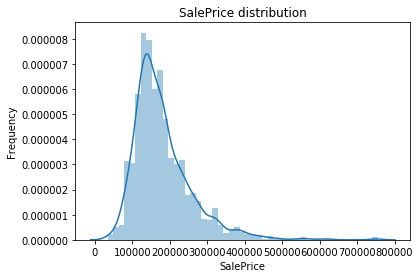

In [8]:
# Plot Histogram
sns.distplot(df["SalePrice"])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

From the observation, we can able to understand that our target variable is Right skewed.

### 3.6 Multivariable Analysis

We are going to analyze the predictor variables that are going to help us for prediction.

Let's check the columns with Categorical Data.

In [9]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Let's filter the columns with Numerical Data.

In [10]:
df.select_dtypes(include = ["int64","float64"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Derving the total number of features.

In [11]:
categorical =  len(df.select_dtypes(include=['object']).columns)
numerical = len(df.select_dtypes(include = ["int64","float64"]).columns)
print("Total number of features is: {} categorical + {} numerical = {} features".format(categorical,numerical, categorical + numerical))

Total number of features is: 43 categorical + 38 numerical = 81 features


With 81 features, how could we possibly tell which feature is most related to house prices? Good thing we have a correlation matrix. Let's do it!

Text(0.5, 1, 'Correlation between the Numerical features')

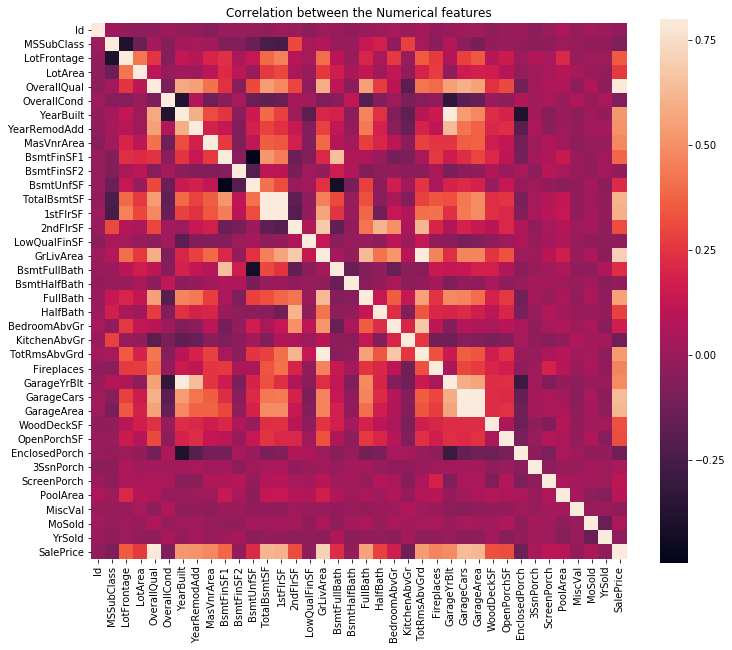

In [27]:
# Correlation Matrix Heatmap
plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), vmax=.8, square=True);
plt.title("Correlation between the Numerical features")

Well, the most correlated features to Sale Price are,

- OverallQual: Rates the overall material and finish of the house
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- YearBuilt: Original construction date

Let's take a look at how each relates to Sale Price seperately.

First, lets viusalize Overall House Quality vs SalePrice and see how they are related to each other.

#### 3.6.1 Visualizing Overall House Quality vs Sale Price

Text(0.5, 1.0, 'Visualizing Overall House Quality vs Sale Price')

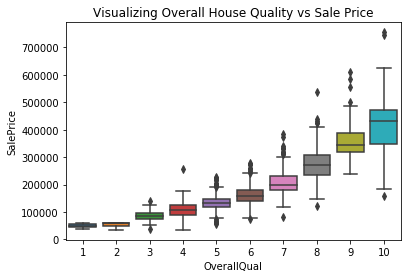

In [18]:
# Overall House Quality vs Sale Price
sns.boxplot(x = 'OverallQual' , y = 'SalePrice', data = df)
plt.title("Visualizing Overall House Quality vs Sale Price")

We can able to understand that Sale Price of the house increases with the increase in quality.

#### 3.6.2 Visualizing Living Area vs Sale Price

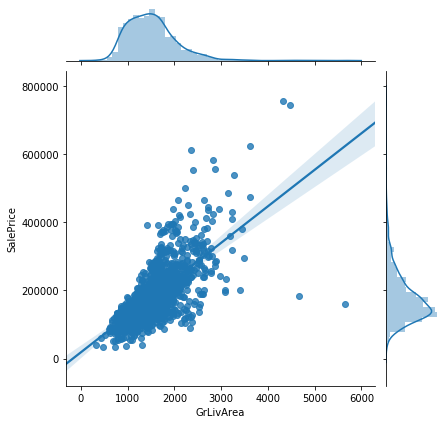

In [22]:
# Living Area vs Sale Price
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

We can able to understand that there is a linear relationship between the Sale Price and the Living area. Values are not normally distributed and it is skewed. We have to scale the values to make it normally distributed.

#### 3.6.3 Visualizing Size of garage in car capacity vs Sale Price

Text(0.5, 1.0, 'Visualizing Size of garage in car capacity vs Sale Price')

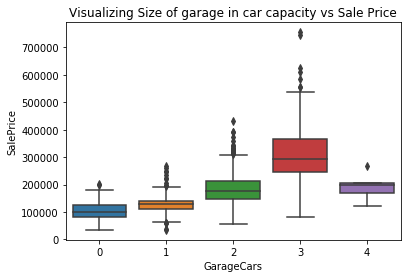

In [24]:
# Size of garage in car capacity vs Sale Price
sns.boxplot(x = 'GarageCars' , y = 'SalePrice', data = df)
plt.title("Visualizing Size of garage in car capacity vs Sale Price")

We can able to understand that there is a increase in Sale Price until the house has a space for 3 cars, post which garage size does not affect the Sale Price.

#### 3.6.4 Visualizing Size of garage in square feet vs Sale Price

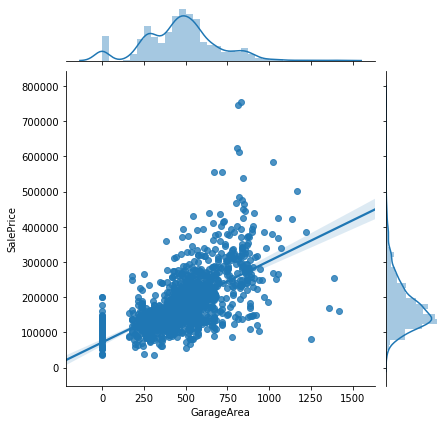

In [25]:
# Size of garage in square feet vs Sale Price
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

We can able to understand that there is a increase in Sale Price when there is a increase in Garage area. Values are not normally distributed and it is skewed. We have to scale the values to make it normally distributed.

#### 3.6.5 Visualizing Original construction date vs Sale Price

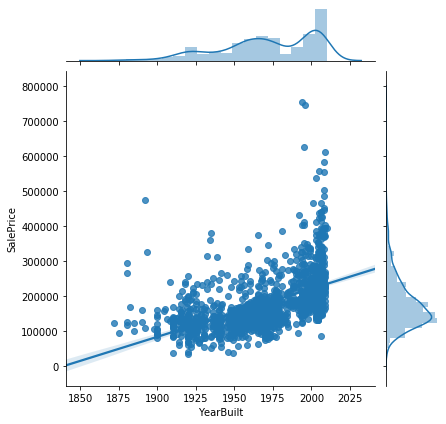

In [26]:
# Original construction date vs Sale Price
sns.jointplot(x=df['YearBuilt'], y=df['SalePrice'], kind='reg')

We can able to understand that there is a increase in Sale Price when the house built in recent years. Values are not normally distributed and it is skewed. We have to scale the values to make it normally distributed.

Before scaling the values, we can check the distribution of all the numerical features in the dataset.

#### 3.6.6 Visualizing the distribution of Numerical features

Let's visualize the distribution of numerical features in a Histogram.

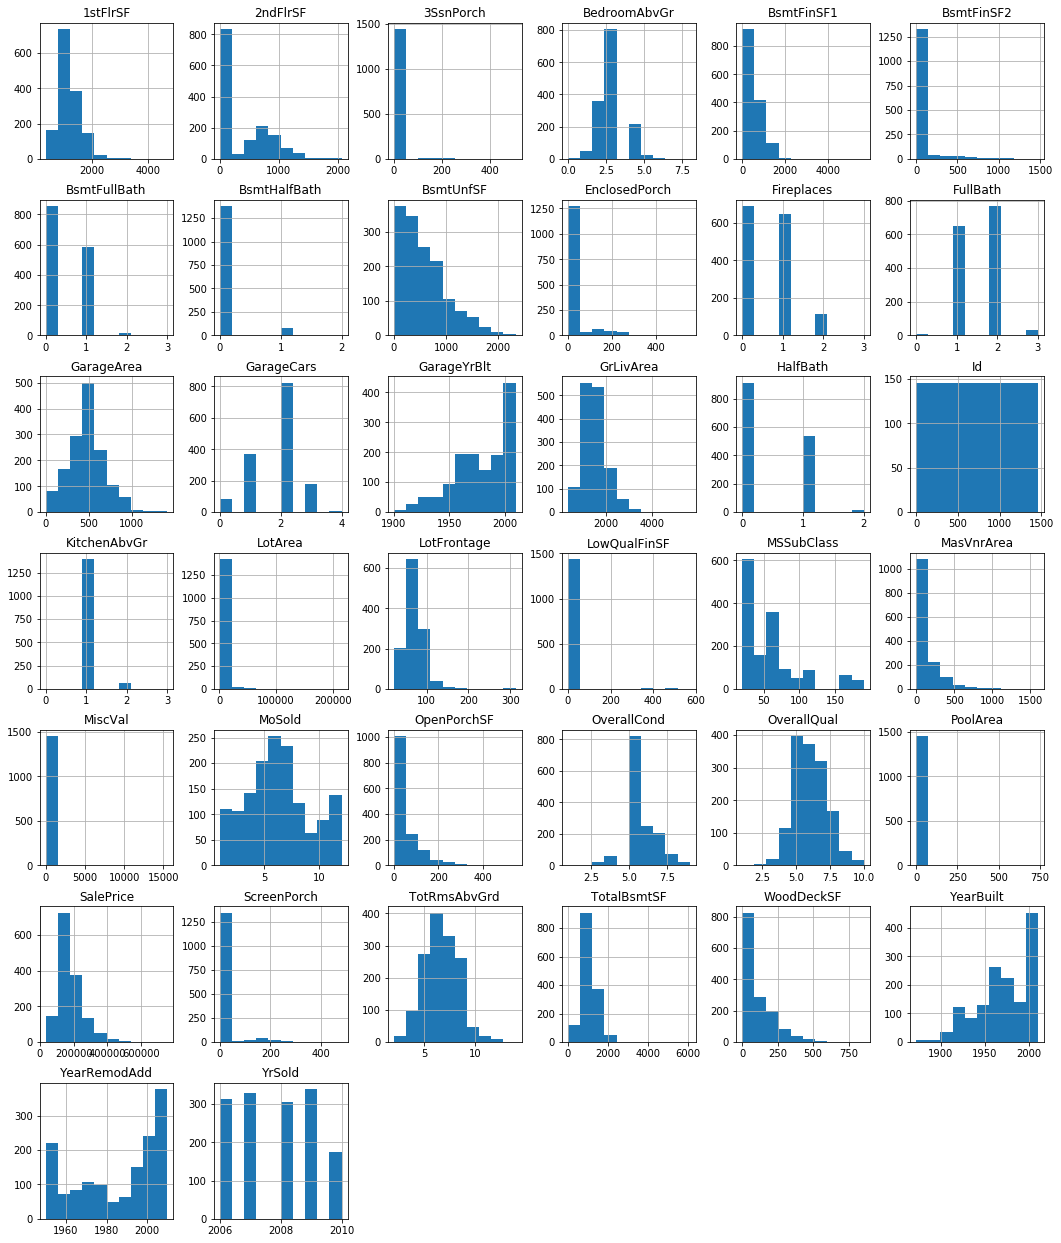

In [28]:
# Distribution of Numerical features
df.hist(figsize=(18,22))
plt.show()

### 3.7 Handling the Missing values

Let's first drop the ID column, which is the primary key in the dataset. The reason for deleting ID column is that it does not have any correlation with the target variable and its not the possible predictor of house price.

In [29]:
filtered_df = df.drop(["Id"], axis = 1)

Checking the columns that have null or NaN values in the dataset.

In [30]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Dropping the columns that have more than 500 null values in the dataset.

In [31]:
filtered_df = filtered_df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis = 1)

Checking the shape of the dataset after dropping null columns.

In [32]:
filtered_df.shape

(1460, 75)

Checking the null or NaN values in the data after dropping the columns.

In [33]:
null_columns = filtered_df.columns[filtered_df.isnull().any()]
filtered_df[null_columns].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Checking the datatypes of the missing value fields which can be replaced with statistical analysis methods(Mean, Median and Mode)

In [34]:
filtered_df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
LotFrontage     1201 non-null float64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


Replacing the float type missing values (LotFrontage, MasVnrArea, GarageYrBlt) with mean.

In [35]:
mean_LotFrontage = filtered_df.LotFrontage.mean()
mean_MasVnrArea = filtered_df.MasVnrArea.mean()
mean_GarageYrBlt = filtered_df.GarageYrBlt.mean()

filtered_df.LotFrontage.fillna(mean_LotFrontage, inplace = True)
filtered_df.MasVnrArea.fillna(mean_MasVnrArea, inplace = True)
filtered_df.GarageYrBlt.fillna(mean_GarageYrBlt, inplace = True)

Replacing the object type missing value columns with mode.

In [36]:
filtered_df.MasVnrType.fillna(filtered_df["MasVnrType"].mode()[0], inplace = True)
filtered_df.BsmtQual.fillna(filtered_df["BsmtQual"].mode()[0], inplace = True)
filtered_df.BsmtCond.fillna(filtered_df["BsmtCond"].mode()[0], inplace = True)
filtered_df.BsmtExposure.fillna(filtered_df["BsmtExposure"].mode()[0], inplace = True)
filtered_df.BsmtFinType1.fillna(filtered_df["BsmtFinType1"].mode()[0], inplace = True)
filtered_df.BsmtFinType2.fillna(filtered_df["BsmtFinType2"].mode()[0], inplace = True)
filtered_df.Electrical.fillna(filtered_df["Electrical"].mode()[0], inplace = True)
filtered_df.GarageType.fillna(filtered_df["GarageType"].mode()[0], inplace = True)
filtered_df.GarageFinish.fillna(filtered_df["GarageFinish"].mode()[0], inplace = True)
filtered_df.GarageQual.fillna(filtered_df["GarageQual"].mode()[0], inplace = True)
filtered_df.GarageCond.fillna(filtered_df["GarageCond"].mode()[0], inplace = True)

### 3.8 Dummy variable creation

Let's analyze the categorical columns for dummy variable creation.

First let's filter out the categorical columns in the dataset.

In [37]:
filtered_df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Analyzing the categorical values in the MSZoning - The general zoning classification feature.

In [38]:
filtered_df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Analyzing the categorical values in the SaleCondition - Condition of sale feature.

In [39]:
filtered_df.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

Creating the dummy variables for the categorical features in the data set.

In [40]:
cat_columns = filtered_df.select_dtypes(include=['object']).columns
filtered_df = pd.get_dummies(filtered_df, columns = cat_columns, drop_first = True)

Checking the shape of the dataset after creating the dummy variables.

In [41]:
filtered_df.shape

(1460, 233)

We can able to see that number of features have increased after creating the dummy variables.

## 4. Feature Engineering

### 4.1 Filtering the Predictor variables

Let's filter the predictor variables in the dataset.

In [42]:
X = filtered_df.loc[:, filtered_df.columns != "SalePrice"]
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


### 4.2 Filtering the Target variable

Let's filter the Target variable in the dataset.

In [43]:
Y = filtered_df.SalePrice
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### 4.3 Applying Feature scaling

Applying feature scaling technique in the dataset to reduce the skewness of target variable and normally distribute predictors.

Importing the StandardScaler package for standardizing the predictor variables.

In [44]:
from sklearn.preprocessing import StandardScaler

Applying Standard scaling technique to the predictor variables.

In [45]:
scaled_X = StandardScaler().fit(X).transform(X)
scaled_X = pd.DataFrame(scaled_X)
scaled_X.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


The distribution of 'SalePrice' is right-skewed which is reflected in the skewness factor which is positive. We would like to get the skewness factor as close to zero as possible (i.e. a normal or Gaussian distribution).

This can accomplished by either removing outliers or transforming the variable. Removing outliers may be tricky as expertise in real estate is needed to assess whether outliers should be removed or not. Applying transformations is typically a safer option, if it can deliver the desired outcome. In the case of positive skewness, log transformation does the trick.

In [46]:
scaled_Y_std = np.log(Y)
scaled_Y = pd.DataFrame(scaled_Y_std)
scaled_Y.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


Let's visualize the distribution of the target variable before and after applying the log transformation.

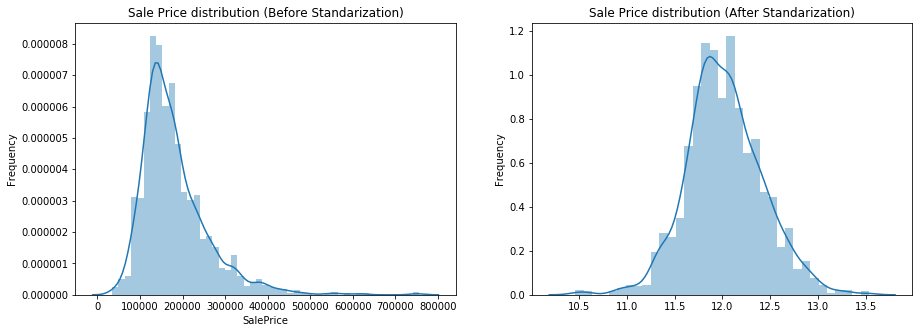

In [47]:
plt.subplots(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(df["SalePrice"])
plt.ylabel("Frequency")
plt.title("Sale Price distribution (Before Standardization)")

plt.subplot(1,2,2)
sns.distplot(scaled_Y)
plt.ylabel("Frequency")
plt.title("Sale Price distribution (After Standardization)")

plt.show()

We can able to see that our target variable is normally distributed after applying the log transformation.

### 4.4 Applying Feature Selection

Applying Feature selection technique for finding the most important predictors of the target variable.

Let's apply the Principal component analysis technique for finding the principal components for our prediction.

Importing the PCA package from sklearn.decomposition library.

In [48]:
from sklearn.decomposition import PCA

Applying the PCA technique for finding the principal components.

In [49]:
pca = PCA(0.90)
X_features = pca.fit_transform(scaled_X)
X_features.shape

(1460, 131)

We can able to see that PCA technique has chosed the most important 131 predictor variables for prediction from the list of 232 variables.

### 4.5 Splitting the train and test data

Let's split the training data for training the model and predicting the target values for the test set.

Importing the train_test_split package from sklearn.model_selection library.

In [50]:
from sklearn.model_selection import train_test_split

Splitting the training and the test set data.

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, scaled_Y, test_size = 0.20, random_state=1)

Let's check the dimensions of the training and the test set data.

In [52]:
X_train.shape

(1168, 131)

In [53]:
X_test.shape

(292, 131)

In [54]:
Y_train.shape

(1168, 1)

In [55]:
Y_test.shape

(292, 1)

## 5. Model Development

Let's develop models to prdict the house price in our dataset.

### 5.1 Applying the Linear Regressor

Importing the linear regressor from sklearn.linear_model library.

In [56]:
from sklearn.linear_model import LinearRegression

Fitting the traning set to the regressor object.

In [57]:
linregressor = LinearRegression()
linregressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the house price with linear regressor for the test set values.

In [58]:
Y_pred_linregressor = linregressor.predict(X_test)

### 5.2 Applying the Random Forest Regressor

Let's develop the Random Forest Regression model for predicting the house price.

Importing the Random Forest regressor from sklearn.ensemble library.

In [59]:
from sklearn.ensemble import RandomForestRegressor

Fitting the traning set to the regressor object with tuned parameters.

In [60]:
randregressor = RandomForestRegressor(n_estimators=1200,
                                      max_depth=15,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      oob_score=True,
                                      random_state=42)

randregressor.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1200,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

Predicting the house price with Random Forest regressor for the test set values.

In [61]:
Y_pred_randregressor = randregressor.predict(X_test)

## 6.Model Evaluation

Let's apply the model evaluation techniques for evaluating our two models that we have developed and see which is the best for future predictions.

The list of Model evaluation techniques for regression are,

- Mean absolute error
- Mean squared error
- Root mean squared error
- R2 score

Importing the model evaluation packages from sklearn.metrics library.

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 6.1 Evaluating Mean absolute error

In [63]:
MAE_lin = mean_absolute_error(Y_test, Y_pred_linregressor)
MAE_ran = mean_absolute_error(Y_test, Y_pred_randregressor)

print("Mean Absolute error for Linear Regresssion is: {}".format(MAE_lin))
print("Mean Absolute error for Random Forest Regresssion is: {}".format(MAE_ran))

Mean Absolute error for Linear Regresssion is: 0.12053821868198443
Mean Absolute error for Random Forest Regresssion is: 0.11721705792913661


### 6.2 Evaluating Mean squared error

In [64]:
MSE_lin = mean_squared_error(Y_test, Y_pred_linregressor)
MSE_ran = mean_squared_error(Y_test, Y_pred_randregressor)

print("Mean Squared error for Linear Regresssion is: {}".format(MSE_lin))
print("Mean Squared error for Random Forest Regresssion is: {}".format(MSE_ran))

Mean Squared error for Linear Regresssion is: 0.07322086669713593
Mean Squared error for Random Forest Regresssion is: 0.02765842884647277


### 6.3 Evaluating Root Mean squared error

In [65]:
print("Root Mean Squared error for Linear Regresssion is: {}".format(np.sqrt(MSE_lin)))
print("Root Mean Squared error for Random Forest Regresssion is: {}".format(np.sqrt(MSE_ran)))

Root Mean Squared error for Linear Regresssion is: 0.27059354518749323
Root Mean Squared error for Random Forest Regresssion is: 0.16630823445179366


### 6.4 Evaluating R2 Score

Model which is predicting the R2 score closer to 1 is the best model.

In [66]:
R2_lin = r2_score(Y_test, Y_pred_linregressor)
R2_ran = r2_score(Y_test, Y_pred_randregressor)

print("R2 score for Linear Regresssion is: {}".format(R2_lin))
print("R2 score for Random Forest Regresssion is: {}".format(R2_ran))

R2 score for Linear Regresssion is: 0.5781129751857654
R2 score for Random Forest Regresssion is: 0.8406365182026584


### 6.5 Visualizing the Actual and Predicted values

Let's visualize the actual and predicted values in a integrated bar chart and compare the closeness of predictions.

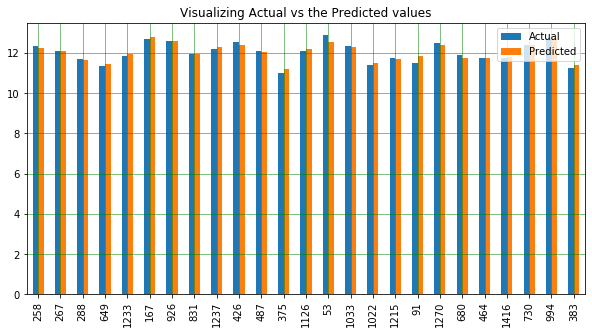

In [82]:
actual_predict_df = pd.DataFrame({'Actual': Y_test["SalePrice"], 'Predicted': Y_pred_randregressor})
actual_predict_df = actual_predict_df.head(25)
actual_predict_df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Visualizing Actual vs the Predicted values")
plt.show()

## 7. Conclusion

Based on our evaluations, we can conclude that Random Forest Regressor is the best model for predicting the house price with R2 score of 0.84 which is closer to 1.

Random Forest Regressor has,

- Less Mean Absolute error
- Less Mean Squared error
- Less Root Mean Squared error and
- R2 score closer to 1

Hence, for future predictions, if the client provides the parameters to our model for predicting the house price, our Random Forest Regressor will provide the reasonable price for the house.